In [1]:
# D8 drainage area raster
# Raster calculator : keep only > accum area threshold
# Turn into polylines
# QChainage plugin in QGIS for evenly spaced points along polylines
# sample area, elevation rasters to points
# add x, y coordinates

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.sans-serif"] = "Arial"
import matplotlib.ticker
import matplotlib.cm as cm
import matplotlib.colors as colors


In [12]:
dry = pd.read_csv('data\\Dry.csv')
fox = pd.read_csv('data\\Fox.csv')
elder = pd.read_csv('data\\Elder_Nodes_6180.csv')
hank = pd.read_csv('data\\Hank_Nodes_1085.csv')

hank.head()


,FID,fid_1,cng__Meter,flow_accum,Ground,X_UTM,Y_UTM
0,0,0,0,1088,895.322998,456808.000000,4381294.00000
1,1,0,1,1099,894.906006,456808.707107,4381293.29289
2,2,0,2,1103,894.617004,456809.585786,4381293.00000
3,3,0,3,1104,894.356018,456810.585786,4381293.00000
4,4,0,4,1105,894.065979,456811.585786,4381293.00000


In [8]:
flowSources = pd.read_csv('data\\FlowheadAccumulationAreas.csv')
flowSources.head()


,Flow_acc ACRR,Typ ACRR,Data_Point ACRR,Flow_acc SRS,Typ SR,Data_Point SR
0,2722730,In channel,1,73,In channel Flowhead,1
1,2642120,In channel,2,5,Flowhead,2
2,32438,Flowhead,3,127,Flowhead,3
3,9515,Flowhead,4,1200770,In channel,4
4,9088,Flowhead,5,278,Piped Flowhead,5


In [14]:
elder['fid_1'] = np.where((elder['ANGELO_FLO'] > 5171000),
                          9999999999,
                          elder['fid_1'])
hank['fid_1'] = np.where((hank['flow_accum'] > 3697380),
                          9999999999,
                          hank['fid_1'])

In [15]:
segmentsDry = set(dry['IX'])
segmentsFox = set(fox['IX'])
segmentsElder = set(elder['fid_1'])
segmentsHank = set(hank['fid_1'])


In [17]:
# dry = dry.sample(frac=0.5)
# fox = fox.sample(frac=0.5)
# elder = elder.sample(frac=0.5)
# hank = hank.sample(frac=0.5)


dry = dry.sort_values(['IX', 'AngeloSage'])
fox = fox.sort_values(['IX', 'AngeloSage'])
hank = hank.sort_values(['fid_1', 'Ground'])
elder = elder.sort_values(['fid_1', 'angelo1m20'])

In [18]:
def dist(x1, y1, x2, y2):
    distance = np.sqrt( (x2 - x1)**2 + (y2 - y1)**2)
    return distance

In [19]:
def get_colors(inp, colormap, vmin=None, vmax=None):
    norm = plt.Normalize(vmin, vmax)
    return colormap(norm(inp))

In [20]:
slopesDry = []
areasDry = []
elevsDry = []
XsDry = []
YsDry = []

slopesFox = []
areasFox = []
elevsFox = []
XsFox = []
YsFox = []

slopesElder = []
areasElder = []
elevsElder = []
XsElder = []
YsElder = []

slopesHank = []
areasHank = []
elevsHank = []
XsHank = []
YsHank = []

In [21]:
contourThreshold = 5


In [ ]:
###DRY

for segment in segmentsDry:
    df = dry[dry['IX'] == segment]
#    df = df.sort_values('AngeloSage')
    #i: iterate over every pixel i in the stream segment
    for i in range(0, len(df)):
        distance = 0
        #j: iterate over this pixel to the end
        foundMax = False
        for j in range(i, len(df)-1):
#                 print 'j = ' + str(j)
                #Calculate new distance
                distance = distance + dist(df.iloc[j]['X'],
                                           df.iloc[j]['Y'],
                                           df.iloc[j+1]['X'],
                                           df.iloc[j+1]['Y'])
                #Calculate elevation difference
                dif = (df.iloc[j+1]['AngeloSage'] - df.iloc[i]['AngeloSage']) 
                if dif > contourThreshold:
                    areasDry.append(df.iloc[i]['flowacc_co'])
                    elevsDry.append(df.iloc[i]['AngeloSage'])
                    XsDry.append(df.iloc[i]['X_UTM'])
                    YsDry.append(df.iloc[i]['Y_UTM'])
                    slopesDry.append((dif/distance)*100)
                    break

                    
                    

In [29]:
###FOX

for segment in segmentsFox:
    df = fox[fox['IX'] == segment]
#    df = df.sort_values('AngeloSage')
    #i: iterate over every pixel i in the stream segment
    for i in range(0, len(df)):
        distance = 0
        #j: iterate over this pixel to the end
        foundMax = False
        for j in range(i, len(df)-1):
#                 print 'j = ' + str(j)
                #Calculate new distance
                distance = distance + dist(df.iloc[j]['X'],
                                           df.iloc[j]['Y'],
                                           df.iloc[j+1]['X'],
                                           df.iloc[j+1]['Y'])
                #Calculate elevation difference
                dif = (df.iloc[j+1]['AngeloSage'] - df.iloc[i]['AngeloSage']) 
                if dif > contourThreshold:
                    areasFox.append(df.iloc[i]['flowacc_co'])
                    elevsFox.append(df.iloc[i]['AngeloSage'])
                    XsFox.append(df.iloc[i]['X_UTM'])
                    YsFox.append(df.iloc[i]['Y_UTM'])
                    slopesFox.append((dif/distance)*100)
                    break


In [11]:
###ELDER

for segment in segmentsElder:
    df = elder[elder['fid_1'] == segment]
#    df = df.sort_values('AngeloSage')
    #i: iterate over every pixel i in the stream segment
    for i in range(0, len(df)):
        distance = 0
        #j: iterate over this pixel to the end
        foundMax = False
        for j in range(i, len(df)-1):
#                 print 'j = ' + str(j)
                #Calculate new distance
                distance = distance + dist(df.iloc[j]['X_UTM'],
                                           df.iloc[j]['Y_UTM'],
                                           df.iloc[j+1]['X_UTM'],
                                           df.iloc[j+1]['Y_UTM'])
                #Calculate elevation difference
                dif = (df.iloc[j+1]['angelo1m20'] - df.iloc[i]['angelo1m20']) 
                if dif > contourThreshold:
                    areasElder.append(df.iloc[i]['ANGELO_FLO'])
                    elevsElder.append(df.iloc[i]['angelo1m20'])
                    XsElder.append(df.iloc[i]['X_UTM'])
                    YsElder.append(df.iloc[i]['Y_UTM'])
                    slopesElder.append((dif/distance)*100)
                    break


In [22]:
###HANK

for segment in segmentsHank:
    df = hank[hank['fid_1'] == segment]
#    df = df.sort_values('AngeloSage')
    #i: iterate over every pixel i in the stream segment
    for i in range(0, len(df)):
        distance = 0
        #j: iterate over this pixel to the end
        foundMax = False
        for j in range(i, len(df)-1):
#                 print 'j = ' + str(j)
                #Calculate new distance
                distance = distance + dist(df.iloc[j]['X_UTM'],
                                           df.iloc[j]['Y_UTM'],
                                           df.iloc[j+1]['X_UTM'],
                                           df.iloc[j+1]['Y_UTM'])
                #Calculate elevation difference
                dif = (df.iloc[j+1]['Ground'] - df.iloc[i]['Ground']) 
                if dif > contourThreshold:
                    areasHank.append(df.iloc[i]['flow_accum'])
                    elevsHank.append(df.iloc[i]['Ground'])
                    XsHank.append(df.iloc[i]['X_UTM'])
                    YsHank.append(df.iloc[i]['Y_UTM'])
                    slopesHank.append((dif/distance)*100)
                    break


In [ ]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True, gridspec_kw = {'height_ratios':[1, 3]})
axarr[0].hist(flowSources['Flow_acc ACRR'][flowSources['Typ ACRR'] == 'Flowhead'], 
              bins = np.logspace(0,8, 50), color='blue', alpha=0.3, label='ACRR')
axarr[0].hist(flowSources['Flow_acc SRS'][flowSources['Typ SR'] == 'Flowhead'], 
              bins = np.logspace(0,8, 50), color='red', alpha=0.3, label='SR')
axarr[0].legend(loc='upper right')


axarr[0].set_ylabel('Flowheads')

# plt.scatter(areasFox,slopesFox,
#             #c = get_colors(elevsFox, plt.cm.jet),
#             color='Blue',
#             label='Fox', alpha=0.1, linewidth=0)
# plt.scatter(areasDry,slopesDry,
#             #c = get_colors(elevsDry, plt.cm.jet),
#             color='Red',
#             label='Dry', alpha=0.1, linewidth=0)
axarr[1].scatter(areasElder,slopesElder,
            #c = get_colors(elevsDry, plt.cm.jet),
            color='Blue',
            label='Elder', alpha=0.05, linewidth=0)
plt.scatter(areasHank,slopesHank,
            #c = get_colors(elevsDry, plt.cm.jet),
            color='Red',
            label='Hank', alpha=0.05, linewidth=0)
plt.legend(loc='upper left',numpoints=1)
plt.xlabel(r'Upslope drainage area (m$^2$)')
plt.ylabel('Slope (%)')
plt.xlim([1,10**8])
plt.ylim([0.1,100])
plt.xscale('log')
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.title('3m-elevation-drop slope calculation')
plt.savefig('Figs\\ChannelNetwork-SlopeArea-Elder3mHistogram.pdf')

In [ ]:
plt.hist(flowSources['Flow_acc ACRR'], 
            bins = np.logspace(3,8, 50))
plt.gca().set_xscale("log")

In [ ]:
#Dry Creek Slope Map

fig, ax = plt.subplots(figsize=[11,8.5])
ax= plt.scatter(XsDry,YsDry,
            c = slopesDry, cmap = cm.jet, vmin = 0.1, vmax = 150,norm=matplotlib.colors.LogNorm(),
            alpha=1, s=5, linewidth=0, zorder=areasDry)
#cb = plt.colorbar(ax, label='Slope')
cb = plt.colorbar(ax, label='Slope (%)', format=matplotlib.ticker.ScalarFormatter())

plt.axis('equal')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('Distance East [m] (NAD83 UTM Zone 10)')
plt.ylabel('Distance North [m] (NAD83 UTM Zone 10)')

plt.title('Dry Creek Slope')
plt.savefig('Figs\\DrySlopeMap.pdf')

In [ ]:
#Dry Creek Slope Map DISCRETE COLORBAR

fig, ax = plt.subplots(figsize=[11,8.5])

#Slope boundaries 
bounds = [0,1,3,10,20,100,1000]

cmap = cm.nipy_spectral
norm = colors.BoundaryNorm(bounds, cmap.N)

ax= plt.scatter(XsDry,YsDry,
            c = slopesDry, cmap = cmap,norm=norm,
            alpha=1, s=5, linewidth=0, zorder=areasDry)
#cb = plt.colorbar(ax, label='Slope')
cb =plt.colorbar(ax, label='Slope (%)',
                                cmap=cmap, norm=norm, 
                                ticks=bounds, boundaries=bounds, extend='max')

plt.axis('equal')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('Distance East [m] (NAD83 UTM Zone 10)')
plt.ylabel('Distance North [m] (NAD83 UTM Zone 10)')

plt.title('Dry Creek Slope: 5 m elevation drop')
plt.savefig('Figs\\DrySlopeMapDiscrete.pdf')

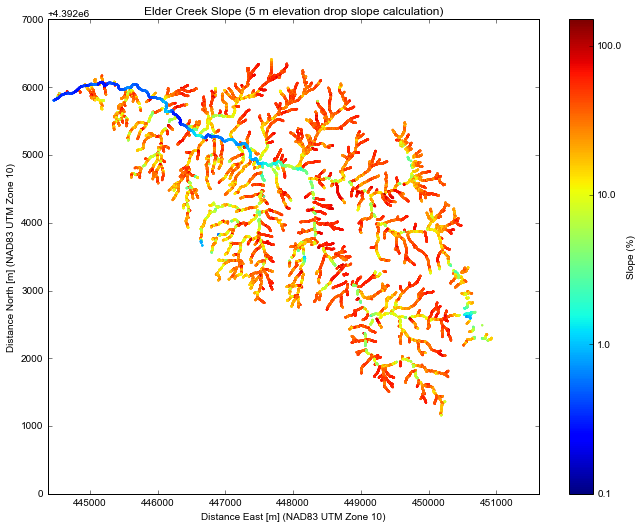

In [12]:
#Elder Creek Slope Map

fig, ax = plt.subplots(figsize=[11,8.5])
ax= plt.scatter(XsElder,YsElder,
            c = slopesElder, cmap = cm.jet, vmin = 0.1, vmax = 150,norm=matplotlib.colors.LogNorm(),
            alpha=1, s=5, linewidth=0, zorder=areasElder)
#cb = plt.colorbar(ax, label='Slope')
cb = plt.colorbar(ax, label='Slope (%)', format=matplotlib.ticker.ScalarFormatter())

plt.axis('equal')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('Distance East [m] (NAD83 UTM Zone 10)')
plt.ylabel('Distance North [m] (NAD83 UTM Zone 10)')

plt.title('Elder Creek Slope (5 m elevation drop slope calculation)')
plt.savefig('Figs\\ElderSlopeMap5m.pdf')

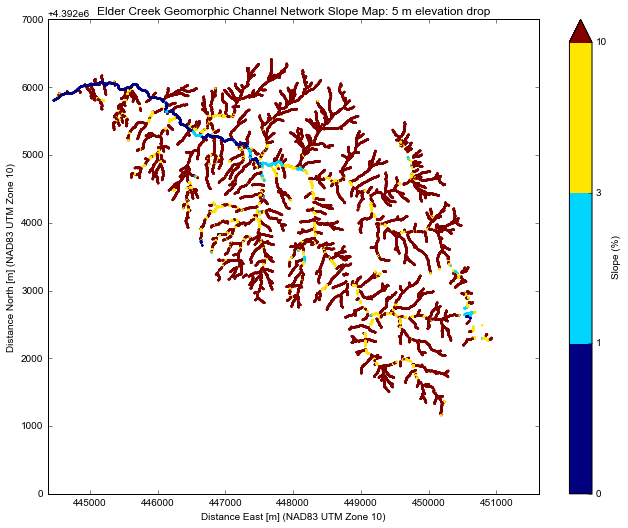

In [14]:
#Elder Creek Slope Map DISCRETE COLORBAR

fig, ax = plt.subplots(figsize=[11,8.5])

#Slope boundaries 
bounds = [0,1,3,10,20,100]

cmap = cm.jet
#cmap.set_over('pink')
norm = colors.BoundaryNorm(bounds, cmap.N)

ax= plt.scatter(XsElder,YsElder,
            c = slopesElder, cmap = cmap,norm=norm,
            alpha=1, s=5, linewidth=0, zorder=areasElder)
#cb = plt.colorbar(ax, label='Slope')
cb =plt.colorbar(ax, label='Slope (%)',
                                cmap=cmap, norm=norm, 
                                ticks=bounds, boundaries=bounds, extend='max')

plt.axis('equal')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('Distance East [m] (NAD83 UTM Zone 10)')
plt.ylabel('Distance North [m] (NAD83 UTM Zone 10)')

plt.title('Elder Creek Geomorphic Channel Network Slope Map: 5 m elevation drop')
plt.savefig('Figs\\ElderSlopeMap5mDiscrete.pdf')

In [ ]:
#Hank Creek Slope Map

fig, ax = plt.subplots(figsize=[11,8.5])
ax= plt.scatter(XsHank,YsHank,
            c = slopesHank, cmap = cm.jet, vmin = 0.1, vmax = 150,norm=matplotlib.colors.LogNorm(),
            alpha=1, s=5, linewidth=0, zorder=areasDry)
#cb = plt.colorbar(ax, label='Slope')
cb = plt.colorbar(ax, label='Slope (%)', format=matplotlib.ticker.ScalarFormatter())

plt.axis('equal')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('Distance East [m] (NAD83 UTM Zone 10)')
plt.ylabel('Distance North [m] (NAD83 UTM Zone 10)')

plt.title('Hank Creek Slope (3 m elevation drop slope calculation)')
plt.savefig('Figs\\HankSlopeMap.pdf')

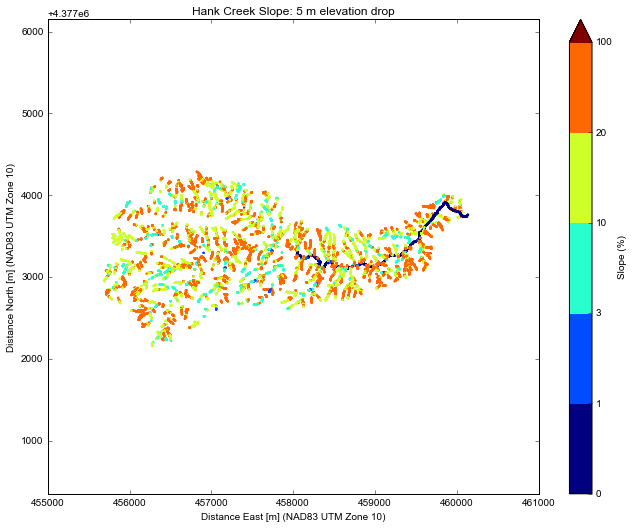

In [23]:
#Hank Creek Slope Map DISCRETE COLORBAR

fig, ax = plt.subplots(figsize=[11,8.5])

#Slope boundaries 
bounds = [0,1,3,10,20,100,1000]

cmap = cm.jet
cmap.set_over('pink')
norm = colors.BoundaryNorm(bounds, cmap.N)

ax= plt.scatter(XsHank,YsHank,
            c = slopesHank, cmap = cmap,norm=norm,
            alpha=1, s=5, linewidth=0, zorder=areasHank)
#cb = plt.colorbar(ax, label='Slope')
cb =plt.colorbar(ax, label='Slope (%)',
                                cmap=cmap, norm=norm, 
                                ticks=bounds, boundaries=bounds, extend='max')

plt.axis('equal')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('Distance East [m] (NAD83 UTM Zone 10)')
plt.ylabel('Distance North [m] (NAD83 UTM Zone 10)')

plt.title('Hank Creek Slope: 5 m elevation drop')
plt.savefig('Figs\\HankSlopeMap5mDiscrete.pdf')

In [ ]:
#FOX CREEK SLOPE MAP

fig, ax = plt.subplots(figsize=[11,8.5])
ax= plt.scatter(XsFox,YsFox,
            c = slopesFox, cmap = cm.jet, vmin = 0.1, vmax = 150,norm=matplotlib.colors.LogNorm(),
            alpha=1, s=5, linewidth=0, zorder=areasFox)
cb = plt.colorbar(ax, label='Slope (%)', format=matplotlib.ticker.ScalarFormatter())
plt.axis('equal')
plt.ylim([4398000, 4401000]) # 4398485.0 4400112
plt.xlim([445000, 449000]) # 445836.0 448219.0

plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('Distance East [m] (NAD83 UTM Zone 10)')
plt.ylabel('Distance North [m] (NAD83 UTM Zone 10)')

plt.title('Fox Creek Slope Map')
plt.savefig('Figs\\FoxSlopeMap.pdf')

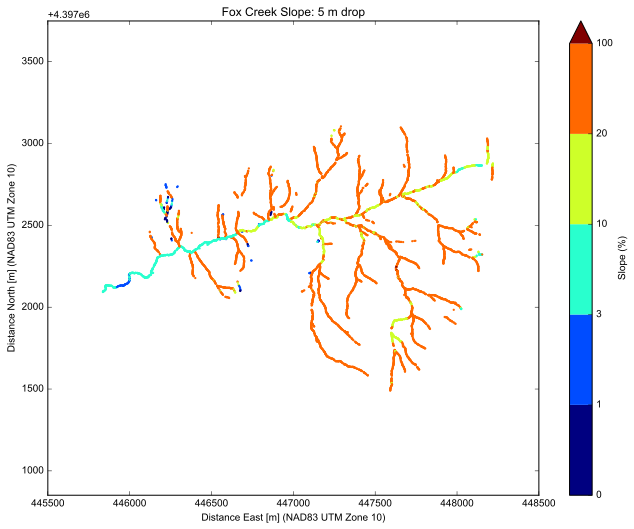

In [32]:
#Fox Creek Slope Map DISCRETE COLORBAR

fig, ax = plt.subplots(figsize=[11,8.5])

#Slope boundaries 
bounds = [0,1,3,10,20,100,1000]

cmap = cm.jet
cmap.set_over('pink')
norm = colors.BoundaryNorm(bounds, cmap.N)

ax= plt.scatter(XsFox,YsFox,
            c = slopesFox, cmap = cmap,norm=norm,
            alpha=1, s=5, linewidth=0, zorder=areasFox)
#cb = plt.colorbar(ax, label='Slope')
cb =plt.colorbar(ax, label='Slope (%)',
                                cmap=cmap, norm=norm, 
                                ticks=bounds, boundaries=bounds, extend='max')

plt.axis('equal')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('Distance East [m] (NAD83 UTM Zone 10)')
plt.ylabel('Distance North [m] (NAD83 UTM Zone 10)')

plt.title('Fox Creek Slope: 5 m drop')
plt.savefig('Figs\\FoxSlopeMapDiscrete.pdf')